In [145]:
from create_matrix import *
from tensor_custom_core import *
from degree_days import dds


In [15]:
%matplotlib inline

In [242]:
appliance_index = {appliance: APPLIANCES_ORDER.index(appliance) for appliance in APPLIANCES_ORDER}

In [243]:
appliance_index

{'aggregate': 0, 'dw': 4, 'fridge': 2, 'hvac': 1, 'mw': 3, 'oven': 6, 'wm': 5}

In [244]:
region, year='Austin', 2014
df, dfc = create_matrix_single_region(region, year)
start, stop=1, 13
energy_cols = np.array([['%s_%d' % (appliance, month) for month in range(start, stop)] for appliance in APPLIANCES_ORDER]).flatten()

static_cols = ['area', 'total_occupants', 'num_rooms']
static_df = df[static_cols]
static_df = static_df.div(static_df.max())
weather_values = np.array(dds[2014]['Austin'][start - 1:stop - 1]).reshape(-1, 1)

dfc = df.copy()

df = dfc[energy_cols]
col_max = df.max().max()
col_min = df.min().min()
#df = (1.0 * (df - col_min)) / (col_max - col_min)
tensor = df.values.reshape((len(df), 7, stop-start))
M, N, O = tensor.shape
mask = np.ones(M).astype('bool')

case=2
a=1
cost='abs'
pred = {}
# Find location of test home in the tensor
for i in range(len(df))[:2]:
    home_num = df.index.values[i]
    print home_num, i
    tensor_copy = tensor.copy()
    tensor_copy[i, 1:, :] = np.NaN
    #H, A, T = learn_HAT(case, tensor_copy, a, a, num_iter=2000, lr=0.1, dis=True, cost_function=cost, H_known=static_df.values[:, :1],
    #                   T_known=weather_values)
    H, A, T = learn_HAT(case, tensor_copy, a, a, num_iter=2000, lr=0.1, dis=False, cost_function=cost)
    HAT = multiply_case(H, A, T, case)
    for appliance in APPLIANCES_ORDER:
        if appliance not in pred:
            pred[appliance] = {}
        pred[appliance][home_num] = HAT[i, appliance_index[appliance], :]
        
        


22 0
26 1


In [245]:
pd.DataFrame(pred['hvac']).T

,0,1,2,3,4,5,6,7,8,9,10,11
22,62.471572,55.410332,53.118615,60.043946,76.834781,103.934606,118.272531,132.008925,101.780323,80.768915,55.400818,61.628702
26,197.588469,175.254417,167.991462,189.888600,242.967288,328.637097,373.999833,417.375268,321.821204,255.392346,175.211229,194.909950


In [246]:
pd.DataFrame(pred['aggregate']).T

,0,1,2,3,4,5,6,7,8,9,10,11
22,237.468800,210.627407,201.916064,228.240836,292.066661,395.079322,449.581072,501.796262,386.890400,307.021209,210.591242,234.264861
26,751.299039,666.377326,638.761081,722.021502,923.844853,1249.590815,1422.075475,1587.003734,1223.674454,971.089179,666.213110,741.114393


In [248]:
df[['aggregate_%d' %month for month in range(start, stop)]].head(2)

,aggregate_1,aggregate_2,aggregate_3,aggregate_4,aggregate_5,aggregate_6,aggregate_7,aggregate_8,aggregate_9,aggregate_10,aggregate_11,aggregate_12
22,378.088959,321.616699,255.916443,277.545471,308.597168,367.201874,398.430786,439.061493,328.362793,241.123642,265.382141,290.065521
26,765.002808,663.851074,769.035828,698.147339,995.478821,1299.501831,1035.324097,1708.114868,1231.774048,1073.366699,667.831177,800.943237


In [249]:
df[['hvac_%d' %month for month in range(start, stop)]].head(2)

,hvac_1,hvac_2,hvac_3,hvac_4,hvac_5,hvac_6,hvac_7,hvac_8,hvac_9,hvac_10,hvac_11,hvac_12
22,138.796936,116.709915,51.263603,63.073967,96.288300,185.116989,223.729828,262.991455,150.238037,75.410019,71.005249,68.409950
26,7.635717,2.044650,49.361549,81.417267,236.560089,493.189484,387.065552,841.948120,504.574371,335.706543,21.578133,1.644383


In [204]:
T.shape

(12, 1)

In [205]:
HAT.shape

(539, 7, 12)

In [211]:
pd.DataFrame(HAT[:,2,:]).mean()

0     26.674575
1     23.659411
2     22.680204
3     25.636476
4     32.804641
5     44.372895
6     50.493938
7     56.356968
8     43.452900
9     34.483519
10    23.654457
11    26.313504
dtype: float64

In [222]:
pd.DataFrame(pred)

,dw,fridge,hvac,mw,oven,wm
22,0 0 1.341712 1 1.190056 2 1.1...,0 0 62.471570 1 55.410328 2...,0 0 237.468793 1 210.627390 2...,0 0 10.403090 1 9.227216 2 ...,0 0 0.936752 1 0.830870 2 0.7...,0 0 2.223723 1 1.972373 2 1.8...
26,0 0 4.248449 1 3.768234 2 3.6...,0 0 197.588456 1 175.254465 2...,0 0 751.298986 1 666.37750...,0 0 32.924062 1 29.202561 2 ...,0 0 2.963753 1 2.628752 2 2.5...,0 0 7.027799 1 6.233426 2 ...


In [154]:
from common_functions import compute_rmse_fraction

In [236]:
compute_rmse_fraction('fridge', pd.DataFrame(pred['fridge']).T)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [199]:
appliance="hvac"
pd.DataFrame(HAT[i, :, :]).ix[appliance_index[appliance]]

0     433.782442
1     384.749792
2     368.825904
3     416.900855
4     533.469680
5     721.592853
6     821.133361
7     916.478070
8     706.631873
9     560.771636
10    384.669230
11    427.910690
Name: 0, dtype: float64

In [201]:
pd.DataFrame(HAT[:,0,:])

,0,1,2,3,4,5,6,7,8,9,10,11
0,248.029105,219.993106,210.888109,238.376513,305.028499,412.593992,469.509488,524.025902,404.039569,320.639273,219.947042,244.671741
1,759.310769,673.481986,645.608152,729.760540,933.807442,1263.106043,1437.345874,1604.241207,1236.917725,981.597919,673.340967,749.032611
2,231.559586,205.385221,196.884810,222.547942,284.774132,385.197109,438.333328,489.229766,377.210713,299.348326,205.342216,228.425157
3,887.467620,787.152613,754.574219,852.929889,1091.415929,1476.293712,1679.941830,1875.005840,1445.685317,1147.272506,786.987792,875.454709
4,201.867431,179.049322,171.638892,194.011321,248.258443,335.804498,382.127227,426.497376,328.842172,260.963834,179.011831,199.134919
5,860.006725,762.795763,731.225442,826.537694,1057.644264,1430.612781,1627.959418,1816.987566,1400.951500,1111.772473,762.636042,848.365529
6,1060.031513,940.210726,901.297617,1018.778083,1303.636609,1763.352062,2006.598595,2239.591882,1726.792008,1370.354234,940.013857,1045.682748
7,647.719000,574.504006,550.726638,622.511607,796.570847,1077.474226,1226.106978,1368.474613,1055.134662,837.337818,574.383712,638.951367
8,263.766389,233.951524,224.268821,253.501346,324.382357,438.772810,499.299557,557.275001,429.675615,340.983625,233.902537,260.196002
9,467.531191,414.683747,397.520963,449.336198,574.974205,777.733567,885.018435,987.781068,761.608607,604.400284,414.596918,461.202610


In [193]:
pd.DataFrame(pred['hvac']).T.mean()

0      603.572540
1      535.349702
2      513.196733
3      580.096919
4      742.305174
5     1004.058529
6     1142.553774
7     1275.250204
8      983.246632
9      780.279086
10     535.237748
11     595.399563
dtype: float64

In [195]:
df[['aggregate_%d' %month for month in range(start, stop)]].mean()

aggregate_1      660.840981
aggregate_2      567.035560
aggregate_3      559.589831
aggregate_4      597.122320
aggregate_5      745.896280
aggregate_6     1020.126372
aggregate_7     1151.563518
aggregate_8     1281.998236
aggregate_9     1001.518678
aggregate_10     808.282627
aggregate_11     589.233787
aggregate_12     657.494219
dtype: float64

In [149]:
df[['aggregate_%d' %month for month in range(start, stop)]].head(2)

,aggregate_1,aggregate_2,aggregate_3,aggregate_4,aggregate_5,aggregate_6,aggregate_7,aggregate_8,aggregate_9,aggregate_10,aggregate_11,aggregate_12
22,378.088959,321.616699,255.916443,277.545471,308.597168,367.201874,398.430786,439.061493,328.362793,241.123642,265.382141,290.065521
26,765.002808,663.851074,769.035828,698.147339,995.478821,1299.501831,1035.324097,1708.114868,1231.774048,1073.366699,667.831177,800.943237


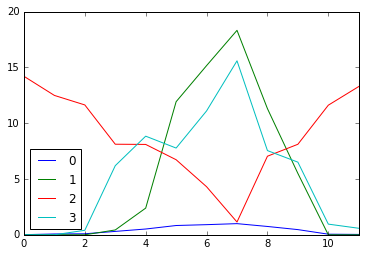

In [150]:
pd.DataFrame(T).plot()

In [78]:
HAT = multiply_case(H, A, T, case)

In [79]:
pd.DataFrame(HAT[i, :, :])

,0,1,2,3,4,5,6,7,8,9,10,11
0,433.782478,384.749795,368.825905,416.900857,533.469680,721.592853,821.133361,916.478071,706.631874,560.771636,384.669225,427.910616
1,114.097757,101.200696,97.012237,109.657386,140.318471,189.800488,215.982617,241.061125,185.865303,147.499701,101.179504,112.553282
2,18.993610,16.846664,16.149420,18.254431,23.358516,31.595682,35.954165,40.128930,30.940600,24.553960,16.843136,18.736504
3,2.448390,2.171636,2.081757,2.353105,3.011053,4.072873,4.634707,5.172859,3.988429,3.165152,2.171181,2.415248
4,4.053890,3.595658,3.446842,3.896124,4.985512,6.743607,7.673857,8.564896,6.603790,5.240661,3.594905,3.999015
5,1.708954,1.515782,1.453047,1.642446,2.101687,2.842828,3.234983,3.610609,2.783887,2.209248,1.515465,1.685821
6,5.905258,5.237756,5.020978,5.675442,7.262341,9.823338,11.178424,12.476390,9.619668,7.634013,5.236659,5.825322


In [80]:
pd.DataFrame(HAT.reshape(539, 84)).head()

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,248.029126,219.993107,210.888110,238.376514,305.028499,412.593993,469.509489,524.025903,404.039570,320.639274,...,2.870906,3.245117,4.152477,5.616810,6.391624,7.133779,5.500356,4.364993,2.994229,3.330816
1,759.310832,673.481991,645.608154,729.760542,933.807443,1263.106044,1437.345875,1604.241209,1236.917725,981.597919,...,8.788927,9.934528,12.712302,17.195178,19.567176,21.839191,16.838666,13.362893,9.166465,10.196885
2,231.559603,205.385220,196.884809,222.547940,284.774129,385.197105,438.333324,489.229762,377.210710,299.348324,...,2.680273,3.029636,3.876746,5.243845,5.967210,6.660084,5.135123,4.075151,2.795407,3.109644
3,887.467692,787.152616,754.574218,852.929889,1091.415927,1476.293709,1679.941826,1875.005836,1445.685313,1147.272503,...,10.272327,11.611283,14.857891,20.097389,22.869734,25.525220,19.680704,15.618289,10.713586,11.917920
4,201.867446,179.049322,171.638891,194.011320,248.258442,335.804496,382.127225,426.497374,328.842171,260.963833,...,2.336590,2.641155,3.379644,4.571444,5.202054,5.806083,4.476663,3.552607,2.436961,2.710904


In [81]:
pd.DataFrame(tensor[i, :, :])

,0,1,2,3,4,5,6,7,8,9,10,11
0,330.802338,285.298523,278.491577,366.379639,466.776825,764.197449,833.317505,1077.180420,756.499695,546.791443,323.729767,383.294556
1,0.000000,0.000000,0.521400,36.607632,115.083450,325.885712,398.898468,561.580811,324.993103,154.531708,0.552217,0.000000
2,37.878517,35.486267,43.560200,59.108418,65.193855,71.006134,65.868279,61.845417,62.528851,59.735748,44.482685,45.888268
3,8.005767,6.132550,4.687033,6.270417,6.698933,5.258967,3.980367,4.624333,5.781416,6.963400,9.656917,9.696151
4,15.436333,15.839884,12.617250,15.518066,16.831617,15.290983,10.394816,13.414667,15.315267,15.300016,18.818600,19.807501
5,2.600800,2.456467,1.445133,19.869850,1.723000,5.101800,1.001083,10.336000,2.167300,1.274367,2.083600,2.477900
6,0.071433,0.063567,0.048600,0.046600,0.053817,0.062550,0.045533,0.082117,0.065433,0.051417,0.061250,0.084017
